In [1]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
from distfit import distfit

In [2]:
#since the dataset is large I am only importing the columns that will be used
all_files = glob.glob(os.path.join("*.csv"))
cols = ['FL_DATE','OP_CARRIER','ORIGIN','DEST','ARR_DELAY']
li = []

for filename in all_files:
    dfr = pd.read_csv(filename, usecols=cols, index_col=None, header=0)
    li.append(dfr)

df = pd.concat(li, axis=0, ignore_index=True)

In [3]:
df

,FL_DATE,OP_CARRIER,ORIGIN,DEST,ARR_DELAY
0,2014-01-01,AA,ICT,DFW,2.0
1,2014-01-01,AA,MIA,TPA,-10.0
2,2014-01-01,EV,DFW,HOU,NaN
3,2014-01-01,EV,CRW,DFW,65.0
4,2014-01-01,EV,DFW,CRW,70.0
...,...,...,...,...,...
30144610,2018-12-31,AA,DCA,CLT,-5.0
30144611,2018-12-31,AA,CLT,DFW,1.0
30144612,2018-12-31,AA,CLT,MEM,11.0
30144613,2018-12-31,AA,CLT,RDU,14.0


In [4]:
#taking only positive values + dropping null values
dly = df[df.ARR_DELAY>0].dropna()
dly

,FL_DATE,OP_CARRIER,ORIGIN,DEST,ARR_DELAY
0,2014-01-01,AA,ICT,DFW,2.0
3,2014-01-01,EV,CRW,DFW,65.0
4,2014-01-01,EV,DFW,CRW,70.0
5,2014-01-01,EV,AMA,DFW,23.0
6,2014-01-01,EV,DFW,AMA,3.0
...,...,...,...,...,...
30144604,2018-12-31,AA,CLT,TPA,9.0
30144608,2018-12-31,AA,DFW,PHL,9.0
30144611,2018-12-31,AA,CLT,DFW,1.0
30144612,2018-12-31,AA,CLT,MEM,11.0


In [26]:
dly.ARR_DELAY.mean()

35.02284070941335

In [27]:
dly.ARR_DELAY.median()

16.0

In [28]:
dly.ARR_DELAY.skew()

6.606914535477172

In [29]:
dly.ARR_DELAY.kurtosis()

85.25799602961428

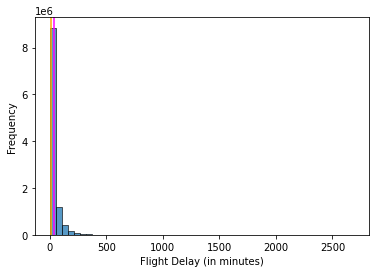

In [22]:
sns.histplot(dly.ARR_DELAY, bins=50)
plt.xlabel(f"Flight Delay (in minutes)")
plt.ylabel("Frequency")
plt.axvline(dly.ARR_DELAY.mean(), color="fuchsia")
plt.axvline(dly.ARR_DELAY.median(), color="orange")

In [30]:
dist = distfit()
dist.fit_transform(dly.ARR_DELAY)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.81 sec] [RSS: 8.14308e-05] [loc=35.023 scale=59.141]
[distfit] >[expon     ] [0.09 sec] [RSS: 4.06624e-06] [loc=1.000 scale=34.023]
[distfit] >[pareto    ] [559. sec] [RSS: 0.000106507] [loc=-1.509 scale=2.509]
[distfit] >[dweibull  ] [1018 sec] [RSS: 9.09422e-05] [loc=8.000 scale=18.465]
[distfit] >[t         ] [468. sec] [RSS: 3.35927e-05] [loc=12.139 scale=10.839]
[distfit] >[genextreme] [1436 sec] [RSS: 4.01437e-05] [loc=9.325 scale=10.940]
[distfit] >[gamma     ] [552. sec] [RSS: 0.000235915] [loc=1.000 scale=1.582]
[distfit] >[lognorm   ] [406. sec] [RSS: 3.81541e-05] [loc=0.440 scale=14.092]
[distfit] >[beta      ] [1028 sec] [RSS: 1.96127e-05] [loc=1.000 scale=13050.819]
[distfit] >[uniform   ] [0.15 sec] [RSS: 0.000229011] [loc=1.000 scale=2691.000]
[distfit] >[loggamma  ] [533. sec] [RSS: 9.56081e-05] [loc=-29641.607 scale=3706.893]
[distfit] >Compute confidence interval [parametric]


{'model': {'distr': <scipy.stats._continuous_distns.expon_gen at 0x1c2aad36710>,
  'stats': 'RSS',
  'params': (1.0, 34.02284070941335),
  'name': 'expon',
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x1c2820337f0>,
  'score': 4.066236268622947e-06,
  'loc': 1.0,
  'scale': 34.02284070941335,
  'arg': (),
  'CII_min_alpha': 2.7451435844086776,
  'CII_max_alpha': 102.9233219511761},
 'summary':          distr     score  LLE           loc         scale  \
 0        expon  0.000004  NaN           1.0     34.022841   
 1         beta   0.00002  NaN           1.0  13050.818757   
 2            t  0.000034  NaN     12.139009     10.839287   
 3      lognorm  0.000038  NaN      0.440323     14.091716   
 4   genextreme   0.00004  NaN      9.325384     10.940288   
 5         norm  0.000081  NaN     35.022841     59.141171   
 6     dweibull  0.000091  NaN           8.0     18.464972   
 7     loggamma  0.000096  NaN -29641.606801   3706.893431   
 8       pareto  0.000107  NaN 

[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nexpon\nRSS(loc=1, scale=34.0228)'}, xlabel='Values', ylabel='Frequency'>)

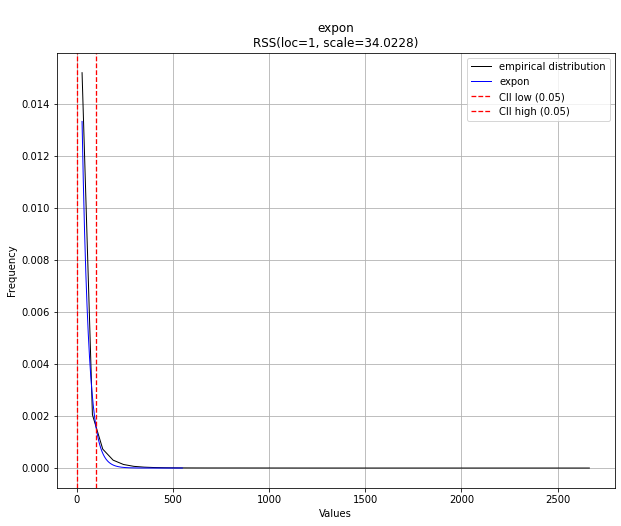

In [31]:
dist.plot()

In [4]:
y = dly.groupby(pd.to_datetime(dly.FL_DATE).dt.year)
y.mean()

,ARR_DELAY
FL_DATE,
2014,32.533315
2015,33.112990
2016,34.811314
2017,36.827919
2018,37.730903


In [5]:
y.median()

,ARR_DELAY
FL_DATE,
2014,16.0
2015,15.0
2016,15.0
2017,16.0
2018,17.0


In [6]:
q = dly.groupby(pd.to_datetime(dly.FL_DATE).dt.quarter)
q.mean()

,ARR_DELAY
FL_DATE,
1,34.567073
2,36.121014
3,36.764263
4,32.342876


In [7]:
q.median()

,ARR_DELAY
FL_DATE,
1,16.0
2,16.0
3,16.0
4,14.0


In [8]:
m = dly.groupby(pd.to_datetime(dly.FL_DATE).dt.month)
m.mean()

,ARR_DELAY
FL_DATE,
1,36.913761
2,35.249568
3,31.777449
4,33.532315
5,35.254657
6,39.013072
7,39.422309
8,38.102170
9,31.220680


In [9]:
m.median()

,ARR_DELAY
FL_DATE,
1,17.0
2,16.0
3,14.0
4,15.0
5,16.0
6,18.0
7,18.0
8,17.0
9,13.0


In [10]:
w = dly.groupby(pd.to_datetime(dly.FL_DATE).dt.isocalendar().week)
w.mean()

,ARR_DELAY
week,
1,43.859830
2,38.835682
3,34.232887
4,29.051040
5,33.507721
6,37.501299
7,33.506829
8,36.299539
9,34.266430


In [11]:
w.median()

,ARR_DELAY
week,
1,22.0
2,19.0
3,15.0
4,13.0
5,15.0
6,17.0
7,15.0
8,17.0
9,16.0


In [12]:
d = dly.groupby(pd.to_datetime(dly.FL_DATE).dt.day_name())
d.mean()

,ARR_DELAY
FL_DATE,
Friday,35.421995
Monday,36.820152
Saturday,33.732775
Sunday,35.141819
Thursday,35.092346
Tuesday,34.802574
Wednesday,33.667016


In [13]:
d.median()

,ARR_DELAY
FL_DATE,
Friday,16.0
Monday,16.0
Saturday,15.0
Sunday,16.0
Thursday,16.0
Tuesday,15.0
Wednesday,15.0


In [42]:
dst = dly.groupby('DEST')
dst.mean()

,ARR_DELAY
DEST,
ABE,36.623104
ABI,30.427040
ABQ,29.208071
ABR,37.555041
ABY,41.089851
...,...
WYS,11.785953
XNA,36.012730
YAK,24.230622


In [43]:
dst.median()

,ARR_DELAY
DEST,
ABE,17.0
ABI,15.0
ABQ,15.0
ABR,12.0
ABY,20.0
...,...
WYS,7.0
XNA,17.0
YAK,12.0


In [44]:
org = dly.groupby('ORIGIN')
org.mean()

,ARR_DELAY
ORIGIN,
ABE,43.745103
ABI,38.197782
ABQ,30.997935
ABR,37.383290
ABY,45.464407
...,...
WYS,21.236239
XNA,45.758030
YAK,29.803178


In [45]:
org.median()

,ARR_DELAY
ORIGIN,
ABE,14.0
ABI,15.0
ABQ,14.0
ABR,11.0
ABY,17.0
...,...
WYS,7.5
XNA,18.0
YAK,13.0


In [46]:
carr = dly.groupby('OP_CARRIER')
carr.mean()

,ARR_DELAY
OP_CARRIER,
9E,49.168585
AA,34.914349
AS,23.765133
B6,42.831371
DL,34.703174
EV,42.412237
F9,42.942410
FL,27.582114
G4,44.930737


In [47]:
carr.median()

,ARR_DELAY
OP_CARRIER,
9E,22.0
AA,16.0
AS,11.0
B6,22.0
DL,14.0
EV,19.0
F9,20.0
FL,14.0
G4,19.0
